In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HMEQ.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
for category in df.columns:
    if df[category].dtype == 'O':
        print(f'{category}: {df[category].unique()}')

REASON: ['HomeImp' 'DebtCon']
JOB: ['Other' 'Office' 'Mgr' 'ProfExe' 'Self' 'Sales' nan]


In [5]:
df['JOB'].fillna('Other', inplace = True)
df.fillna(df.mean(), inplace = True)

In [6]:
df = pd.get_dummies(df)
df_y = df['BAD']
df_x = df.drop('BAD', axis = 1, inplace = False)

In [7]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 777)
print(df_train_x.shape, df_test_x.shape, df_train_y.shape, df_test_y.shape)

(2623, 18) (1125, 18) (2623,) (1125,)


In [8]:
model = ['DecisionTree', 'RandomForest', 'GradientBoosting']
train_accuracy = list()
test_accuracy = list()
model_f1_score = list()
model_auc = list()

In [9]:
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)
dt_model.fit(df_train_x, df_train_y)
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred = dt_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

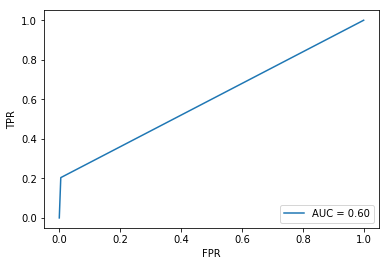

In [10]:
plt.plot(fpr, tpr, label = f'AUC = {roc_auc:0.2f}')
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [11]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [12]:
rf_model = RandomForestClassifier(min_samples_leaf=20, max_depth=4, n_estimators=100, random_state=777)
rf_model.fit(df_train_x, df_train_y)

train_accuracy.append(rf_model.score(df_train_x, df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

y_pred = rf_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)

model_auc.append(roc_auc)

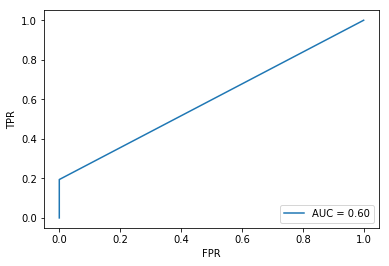

In [13]:
plt.plot(fpr, tpr, label = f'AUC = {roc_auc:0.2f}')
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [14]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [15]:
gb_final = GradientBoostingClassifier(min_samples_leaf=10, max_depth=4, n_estimators=100, learning_rate=.1, random_state=777)
gb_final.fit(df_train_x, df_train_y)

train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

y_pred = gb_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

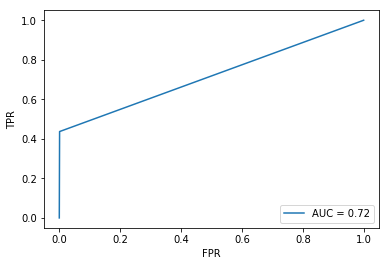

In [16]:
plt.plot(fpr, tpr, label = f'AUC = {roc_auc:0.2f}')
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

model_f1_score.append(f1_score(df_test_y, y_pred))

In [17]:
df_eval = pd.DataFrame(index = model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['F1Score'] = model_f1_score
df_eval['AUC'] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,0.927,0.923,0.326,0.599
RandomForest,0.928,0.926,0.325,0.599
GradientBoosting,0.974,0.948,0.604,0.718


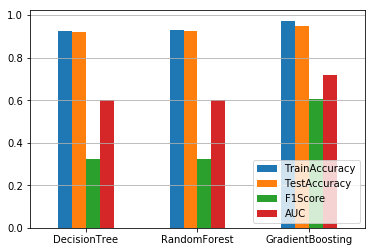

In [18]:
df_eval.plot.bar(rot = 0)
plt.legend(loc = 'lower right')
plt.grid(axis = 'y')